In [1]:
import pandas as pd
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data = pd.read_csv("data/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Separate the features (independent variables) and the target variable
X = data.drop(columns=['target'])
target = data['target']

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


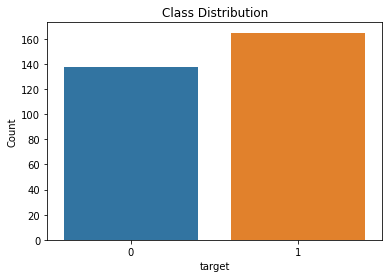

In [7]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['target'])
plt.title('Class Distribution')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()



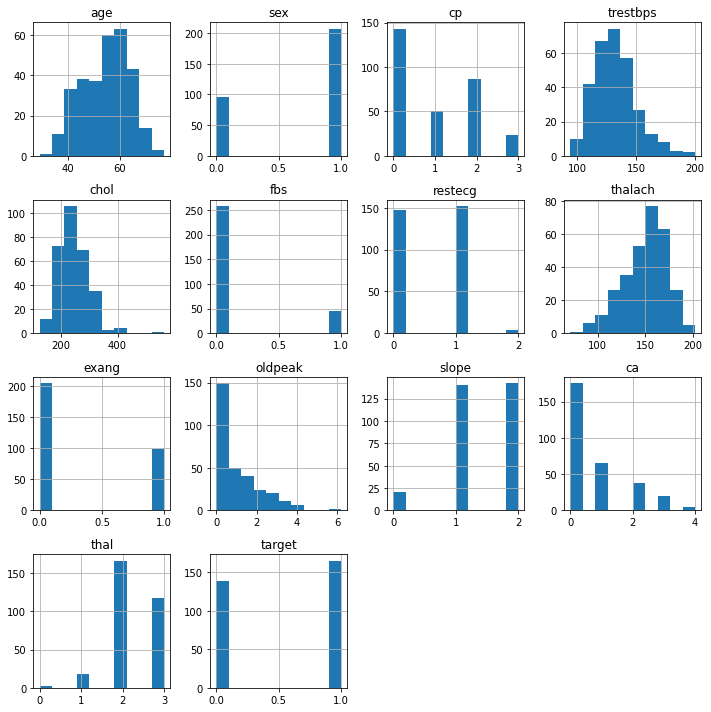

In [8]:
# Feature Distributions
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()



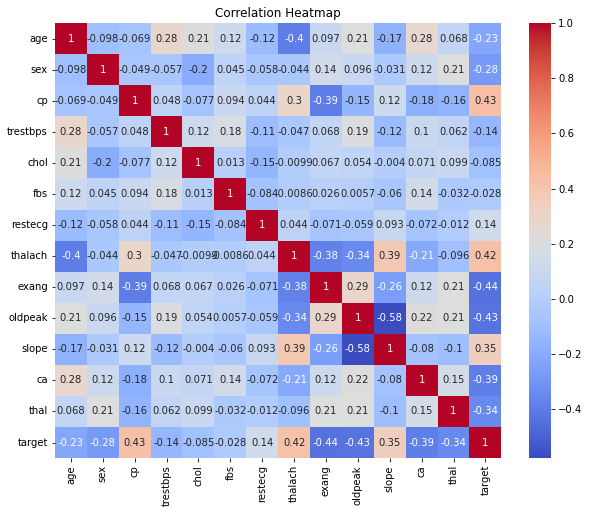

In [9]:
# Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



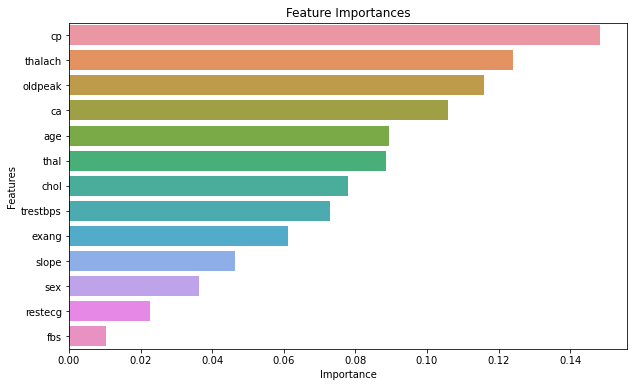

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, target)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [13]:
from lazypredict.Supervised import LazyClassifier

In [14]:
clf = LazyClassifier (verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.39it/s]

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNeighborsClassifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

# Create and train the RidgeClassifierCV model
ridge_model = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the DecisionTreeClassifier model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [16]:
from sklearn.naive_bayes import GaussianNB

# Create and train the GaussianNB model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

NameError: name 'accuracy_score' is not defined

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

# Predict Heart Disease

In [17]:
# Create a function to take user inputs and make predictions
def predict_heart_disease(model):
    # Create an empty dictionary to store user inputs
    user_inputs = {}

    # Iterate through each feature column and get user inputs
    for feature in X.columns:
        user_input = input(f"Enter the value for {feature}: ")
        # Convert the user input to the appropriate data type
        user_inputs[feature] = float(user_input)

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    disease_prediction = nb_model.predict(user_data)

    # Display the predicted outcome
    if disease_prediction[0] == 1:
        print("Predicted Outcome: Yes, the person may have heart disease.")
    else:
        print("Predicted Outcome: No, the person may not have heart disease.")

# Call the function to make predictions with user inputs
predict_heart_disease(nb_model)


KeyboardInterrupt: Interrupted by user

# Heart Disease Predict App

In [ ]:
import gradio as gr

# Create a function to make predictions with the model
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create a dictionary of the user inputs
    user_inputs = {
        'age': float(age),
        'sex': float(sex),
        'cp': float(cp),
        'trestbps': float(trestbps),
        'chol': float(chol),
        'fbs': float(fbs),
        'restecg': float(restecg),
        'thalach': float(thalach),
        'exang': float(exang),
        'oldpeak': float(oldpeak),
        'slope': float(slope),
        'ca': float(ca),
        'thal': float(thal)
    }

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    disease_prediction = nb_model.predict(user_data)

    # Display the predicted outcome
    if disease_prediction[0] == 1:
        return "Yes"
    else:
        return "No"

# Create the Gradio interface
iface = gr.Interface(fn=predict_heart_disease, 
                     inputs=["number", "number", "number", "number", "number", "number", "number", "number",
                             "number", "number", "number", "number", "number"], 
                     outputs="text",
                     title="Heart Disease Prediction",
                     description="Enter the values for each feature to predict the presence of heart disease.")

# Launch the interface
iface.launch()


In [ ]:
41	0	1	130	204	0	0	172	0	1.40	2	0	2

In [18]:
import pickle

# Save the model as a pickle file
with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)